In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, accuracy_score, precision_score

# Carrengar dataframes da série temporal e predição

In [3]:
df = pd.read_csv("dataset/fortaleza.csv", index_col="SE")
predict_py = pd.read_csv("predicoes/predicao-py.csv")
predict_r = pd.read_csv("predicoes/predicao-r.csv")

predict_py.head()

,Unnamed: 0,unique_id,ds,AutoARIMA
0,0,1,2025-05-18,9.906043
1,1,1,2025-05-25,8.929152
2,2,1,2025-06-01,25.723680
3,3,1,2025-06-08,54.582443
4,4,1,2025-06-15,96.772934


In [4]:
predict_r.head()

,Point.Forecast,Lo.80,Hi.80,Lo.95,Hi.95
0,110.801038,-76.321656,297.923733,-175.378427,396.980504
1,119.741424,-185.574549,425.057396,-347.199062,586.681909
2,137.766128,-267.260633,542.792889,-481.668849,757.201105
3,164.287041,-329.695633,658.269715,-591.194264,919.768346
4,200.196273,-380.833941,781.226488,-688.412757,1088.805304


# Selecionar dados de teste

In [5]:
df["ds"] = pd.to_datetime(df["ds"])
y_validation = df[ df.ds.dt.year == 2025 ]
y_validation.head(3)

,ds,y,unique_id
SE,,,
202520,2025-05-11,16,1
202519,2025-05-04,70,1
202518,2025-04-27,109,1


In [16]:
predict_py.tail()

,Unnamed: 0,unique_id,ds,AutoARIMA
47,47,1,2026-04-12,411.21160
48,48,1,2026-04-19,412.78833
49,49,1,2026-04-26,412.44350
50,50,1,2026-05-03,409.23416
51,51,1,2026-05-10,404.65384


In [15]:
df.tail()

,ds,y,unique_id
SE,,,
201405,2014-01-26,180,1
201404,2014-01-19,150,1
201403,2014-01-12,107,1
201402,2014-01-05,77,1
201401,2013-12-29,40,1


# Gráficos

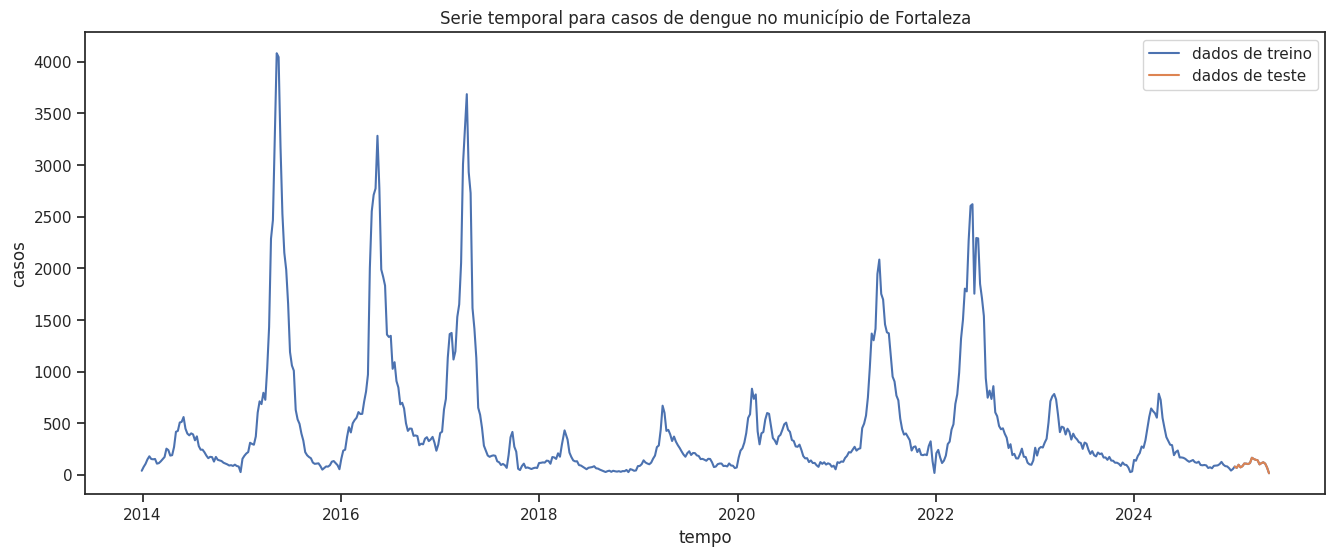

In [7]:
plt.figure("Série temporal completa", figsize=(16,6))
sns.set_theme(style="ticks")

sns.lineplot(data=df, x="ds", y="y", label="dados de treino")
sns.lineplot(data=y_validation, x="ds", y="y", label="dados de teste")
# sns.lineplot(data=predict_py, x="ds", y="AutoARIMA", label="predição")

plt.title("Serie temporal para casos de dengue no município de Fortaleza")
plt.xlabel("tempo")
plt.ylabel("casos")
plt.legend()

plt.show()

/home/xande/Desenvolvimento/dengue-arima-fortaleza/venv/lib/python3.12/site-packages/seaborn/_base.py:1135: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  converter.update_units(seed_data)


TypeError: tz must be string or tzinfo subclass, not <matplotlib.category.UnitData object at 0x71013d6d8560>.

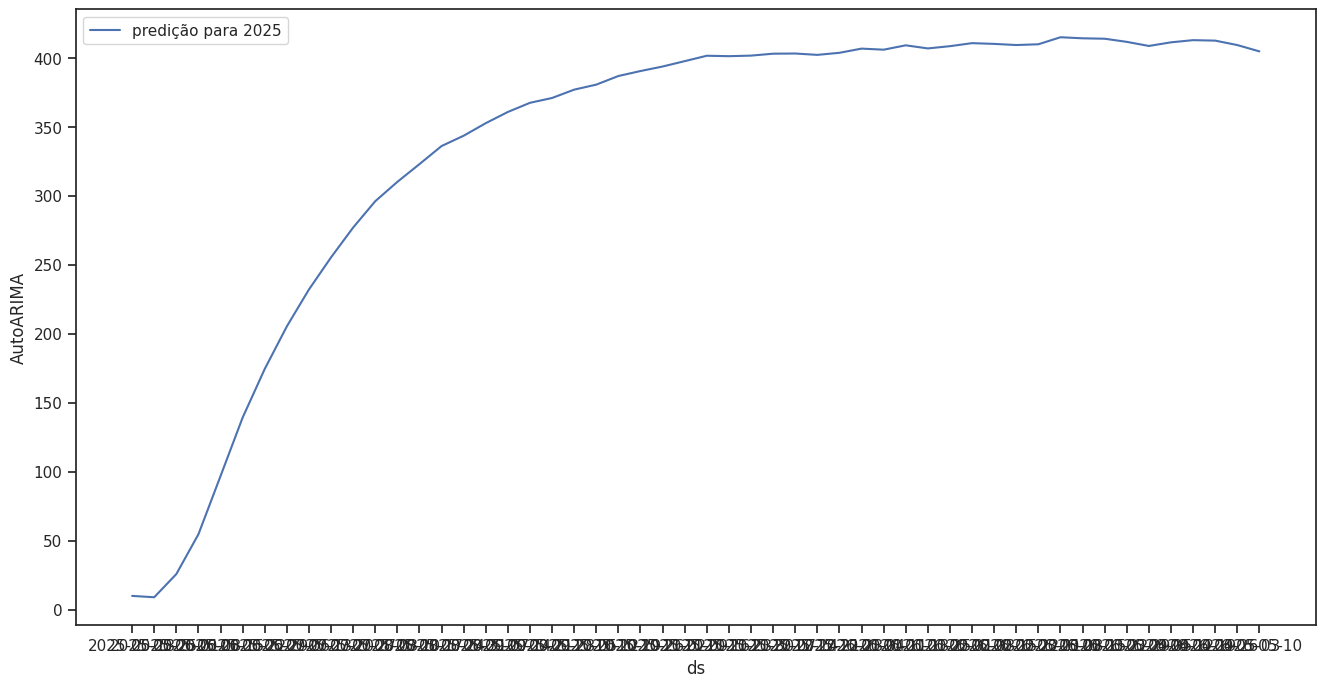

In [13]:
plt.figure("Comparação", figsize=[16,8])

sns.lineplot(data=predict_py, x="ds", y="AutoARIMA", label="predição para 2025")
sns.lineplot(data=y_validation, x="ds", y="y", label="dados de 2025")

plt.title("Comparação de previsão para o ano de 2025")
plt.xlabel("tempo")
plt.ylabel("casos")
plt.legend()

plt.show()

In [24]:
df_cortado

,ds,y,unique_id
SE,,,
202520,2025-05-11,16,1
202519,2025-05-04,70,1
202518,2025-04-27,109,1
202517,2025-04-20,122,1
202516,2025-04-13,114,1
...,...,...,...
201405,2014-01-26,180,1
201404,2014-01-19,150,1
201403,2014-01-12,107,1
